# Modeling Project Overview

This notebook performs a **churn prediction model comparison** between **Logistic Regression** and **Random Forest**. It includes training, evaluation, visualization, and reporting of model performance, along with saving the best-performing model.

---

##  Step 1: Import Required Libraries

We import all the necessary Python libraries for:

- **Data manipulation:** `pandas`, `numpy`
- **Machine learning modeling:** `scikit-learn`
- **Visualization:** `matplotlib`, `seaborn`
- **Displaying styled HTML and Markdown in Jupyter**
- **Saving models:** `pickle`

---



In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from IPython.display import display, Markdown, HTML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
)


##  Step 2: Load and Prepare the Dataset

In this step:

- Load the cleaned/preprocessed dataset.
- Separate the features (`X`) and target (`y`), where the target is the churn status.
- Perform a train-test split using 80% of the data for training and 20% for testing, ensuring class stratification.

---


In [34]:
# Load your preprocessed dataset (replace with your file path if needed)
df = pd.read_csv("C:/Users/LENOVO/Documents/pymodel/customer-churn-prediction/data/processed/telco_processed.csv")  # Replace with actual file

# Split features and target
X = df.drop("Churn", axis=1)
y = df["Churn"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)



##  Step 3: Train Machine Learning Models

We train two supervised classification models:

- **Logistic Regression** (a linear model good for interpretability)
- **Random Forest** (an ensemble model good for accuracy and robustness)

After training, we:

- Generate class predictions (`predict`)
- Generate probability scores (`predict_proba`) for AUC/ROC analysis.

---



In [35]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
lr_proba = lr_model.predict_proba(X_test)[:, 1]
rf_proba = rf_model.predict_proba(X_test)[:, 1]


c:\Users\LENOVO\Documents\pymodel\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



##  Step 4: Evaluate Model Performance

We define a reusable `evaluate()` function that calculates and returns:

- **Accuracy:** Overall correctness
- **Precision:** Correctness of positive predictions
- **Recall:** Ability to find all actual positives
- **F1-score:** Harmonic mean of precision and recall
- **ROC AUC:** Area under the curve for distinguishing classes

These metrics are tabulated and displayed for both models to facilitate comparison.

---


In [36]:
def evaluate(name, y_true, y_pred, proba):
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1": f1_score(y_true, y_pred),
        "ROC AUC": roc_auc_score(y_true, proba)
    }

results = [
    evaluate("Logistic Regression", y_test, lr_pred, lr_proba),
    evaluate("Random Forest", y_test, rf_pred, rf_proba)
]
results_df = pd.DataFrame(results)
results_df


,Model,Accuracy,Precision,Recall,F1,ROC AUC
0,Logistic Regression,0.803127,0.646526,0.572193,0.607092,0.835714
1,Random Forest,0.783937,0.617450,0.491979,0.547619,0.818844



##  Step 5: Visualization

We generate a comprehensive set of plots for model diagnostics and performance:

- **Class Distribution Pie Chart** – to understand class imbalance.
- **Feature Correlation Heatmap** – to visualize relationships between features.
- **Accuracy Comparison Bar Plot** – to compare test set accuracy of both models.
- **Confusion Matrices** – to analyze prediction errors by actual vs. predicted classes.
- **ROC Curves** – to visualize the tradeoff between true positives and false positives, with AUC scores labeled.

These visuals help diagnose overfitting, class imbalance, and the tradeoff between precision and recall.

---


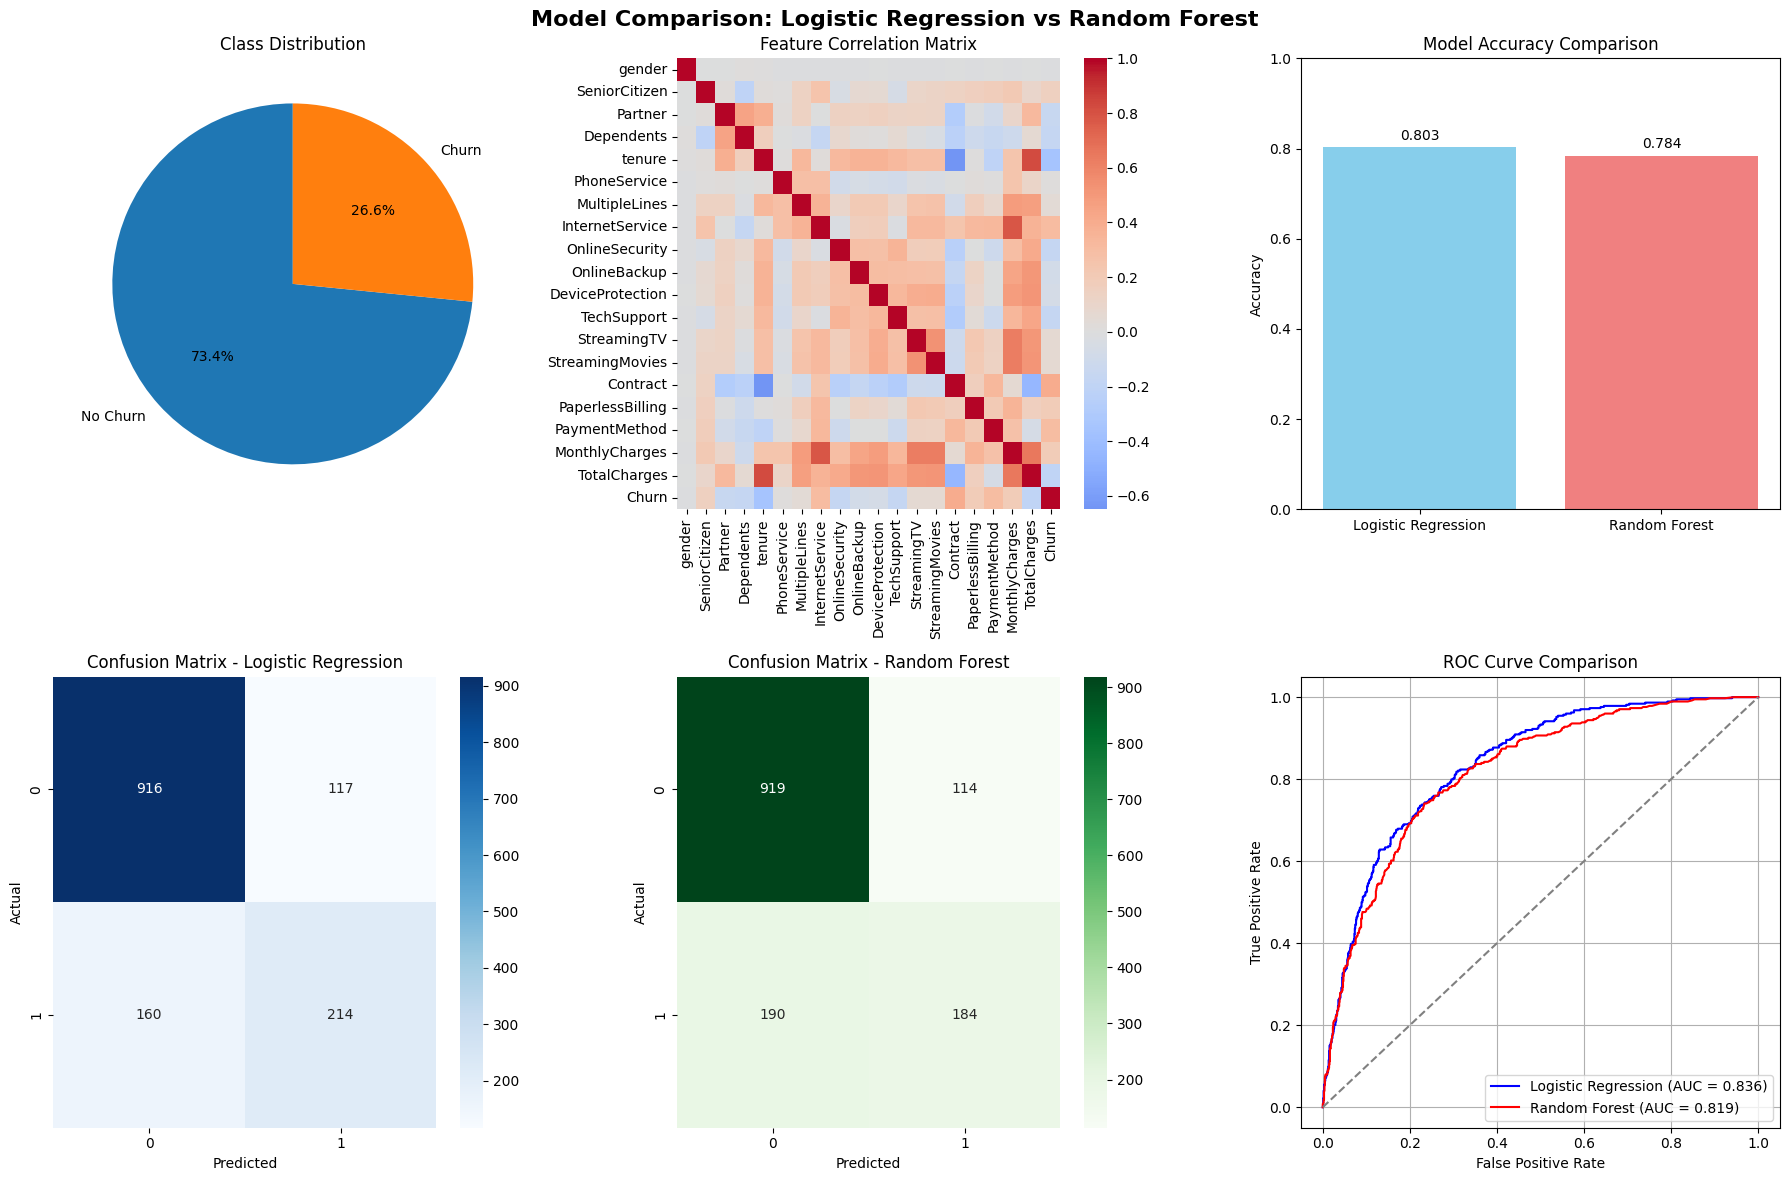

In [37]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Model Comparison: Logistic Regression vs Random Forest', fontsize=16, fontweight='bold')

# 1. Class Distribution
axes[0, 0].pie(y.value_counts(), labels=['No Churn', 'Churn'], autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('Class Distribution')

# 2. Feature Correlation
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', center=0, ax=axes[0, 1])
axes[0, 1].set_title('Feature Correlation Matrix')

# 3. Accuracy Comparison
models = ['Logistic Regression', 'Random Forest']
accuracies = [accuracy_score(y_test, lr_pred), accuracy_score(y_test, rf_pred)]
bars = axes[0, 2].bar(models, accuracies, color=['skyblue', 'lightcoral'])
axes[0, 2].set_title('Model Accuracy Comparison')
axes[0, 2].set_ylabel('Accuracy')
axes[0, 2].set_ylim(0, 1)
for bar, acc in zip(bars, accuracies):
    axes[0, 2].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{acc:.3f}', ha='center', va='bottom')

# 4. Confusion Matrix - LR
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, fmt='d', cmap='Blues', ax=axes[1, 0])
axes[1, 0].set_title('Confusion Matrix - Logistic Regression')
axes[1, 0].set_xlabel('Predicted')
axes[1, 0].set_ylabel('Actual')

# 5. Confusion Matrix - RF
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Greens', ax=axes[1, 1])
axes[1, 1].set_title('Confusion Matrix - Random Forest')
axes[1, 1].set_xlabel('Predicted')
axes[1, 1].set_ylabel('Actual')

# 6. ROC Curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_proba)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_proba)
auc_lr = auc(fpr_lr, tpr_lr)
auc_rf = auc(fpr_rf, tpr_rf)

axes[1, 2].plot(fpr_lr, tpr_lr, color='blue', label=f'Logistic Regression (AUC = {auc_lr:.3f})')
axes[1, 2].plot(fpr_rf, tpr_rf, color='red', label=f'Random Forest (AUC = {auc_rf:.3f})')
axes[1, 2].plot([0, 1], [0, 1], linestyle='--', color='gray')
axes[1, 2].set_title('ROC Curve Comparison')
axes[1, 2].set_xlabel('False Positive Rate')
axes[1, 2].set_ylabel('True Positive Rate')
axes[1, 2].legend()
axes[1, 2].grid(True)

plt.tight_layout()
plt.show()



##  Step 6: Text-Based Summary & Reports

We generate:

- A **Markdown summary** showing dataset stats and key performance metrics.
- **Styled HTML blocks** with full classification reports from both models.
- A final remark on which model performs best based on AUC.

This section provides a clean, readable summary that can be easily exported or displayed in reports.

---


In [38]:
# Classification Reports
lr_report_text = classification_report(y_test, lr_pred, zero_division=0)
rf_report_text = classification_report(y_test, rf_pred, zero_division=0)

# Markdown Summary
markdown_summary = f"""
### MODEL COMPARISON RESULTS

---

#### Dataset Summary
- **Total samples:** {len(df)}
- **Features:** {X.shape[1]}
- **Churn rate:** {(y == 1).mean():.1%}

---

#### Logistic Regression Results (max_iter = 1000)
- **Accuracy:** {(lr_pred == y_test).mean():.3f}
- **AUC Score:** {auc_lr:.3f}

---

#### Random Forest Results (n_estimators = 1000)
- **Accuracy:** {(rf_pred == y_test).mean():.3f}
- **AUC Score:** {auc_rf:.3f}

---

#### Best Performing Model
- **Model:** {"Random Forest" if auc_rf > auc_lr else "Logistic Regression"}

---
"""

# HTML Report
html_classification_reports = f"""
<h3 style="color: #00bcd4;">Detailed Classification Reports</h3>

<h4 style="color: #ffc107;">Logistic Regression:</h4>
<pre style="background-color: #2d2d2d; color: white; padding: 10px; border-radius: 5px;">
{lr_report_text}
</pre>

<h4 style="color: #8bc34a;">Random Forest:</h4>
<pre style="background-color: #2d2d2d; color: white; padding: 10px; border-radius: 5px;">
{rf_report_text}
</pre>

<hr><h4 style="color: #42a5f5;">ANALYSIS COMPLETE</h4>
"""

# Display
display(Markdown(markdown_summary))
display(HTML(html_classification_reports))



### MODEL COMPARISON RESULTS

---

#### Dataset Summary
- **Total samples:** 7032
- **Features:** 19
- **Churn rate:** 26.6%

---

#### Logistic Regression Results (max_iter = 1000)
- **Accuracy:** 0.803
- **AUC Score:** 0.836

---

#### Random Forest Results (n_estimators = 1000)
- **Accuracy:** 0.784
- **AUC Score:** 0.819

---

#### Best Performing Model
- **Model:** Logistic Regression

---



##  Step 7: Save the Best Model

We:

- Compare AUC scores of both models.
- Select the model with the higher AUC.
- Save it as a `.pkl` file using `pickle`.

This allows for reuse in production or Streamlit deployment without retraining.

In [39]:
best_model_name = "Random Forest" if auc_rf > auc_lr else "Logistic Regression"
best_model = rf_model if best_model_name == "Random Forest" else lr_model

with open("best_churn_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print(f"\n Best model ({best_model_name}) saved as 'best_churn_model.pkl'")



 Best model (Logistic Regression) saved as 'best_churn_model.pkl'


##  Conclusion

- The **Logistic Regression** model (max_iter = 1000) achieved an **accuracy of 80.3%** and an **AUC score of 0.836**.
- The **Random Forest** model (n_estimators = 1000) achieved an **accuracy of 78.4%** and an **AUC score of 0.819**.
- Based on both accuracy and AUC metrics, **Logistic Regression** is the **best-performing model** for this churn prediction task.
- Logistic Regression’s stronger performance and interpretability make it a suitable choice for deployment in production or further analysis.

This suggests that for this dataset, a simpler linear model outperformed a more complex ensemble method, highlighting the importance of model evaluation beyond just complexity.
